In [5]:
import pandas as pd
import numpy as np
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

In [6]:
data_frame = pd.read_csv("../main_datasets/sarcasm_data.csv")

In [7]:
data_frame = data_frame[["label", "comment", "votes", "sentiment"]]
data_frame.head()

,label,comment,votes,sentiment
0,0,NC and NH.,-1,0
1,0,You do know west teams play against west teams...,-1,1
2,0,"They were underdogs earlier today, but since G...",3,0
3,0,"This meme isn't funny none of the ""new york ni...",-1,0
4,0,I could use one of those tools.,-1,1


In [8]:
def preprocess(text):
    return simple_preprocess(text, deacc=True, min_len=2, max_len=15)

data_frame['preprocessed_text'] = data_frame['comment'].apply(preprocess)
data_frame.head()

,label,comment,votes,sentiment,preprocessed_text
0,0,NC and NH.,-1,0,"[nc, and, nh]"
1,0,You do know west teams play against west teams...,-1,1,"[you, do, know, west, teams, play, against, we..."
2,0,"They were underdogs earlier today, but since G...",3,0,"[they, were, underdogs, earlier, today, but, s..."
3,0,"This meme isn't funny none of the ""new york ni...",-1,0,"[this, meme, isn, funny, none, of, the, new, y..."
4,0,I could use one of those tools.,-1,1,"[could, use, one, of, those, tools]"


In [9]:
data_frame = data_frame[["comment", "votes", "sentiment","label"]]
data_frame.head()

,comment,votes,sentiment,label
0,NC and NH.,-1,0,0
1,You do know west teams play against west teams...,-1,1,0
2,"They were underdogs earlier today, but since G...",3,0,0
3,"This meme isn't funny none of the ""new york ni...",-1,0,0
4,I could use one of those tools.,-1,1,0


In [13]:
data_frame = data_frame[["label", "comment", "votes", "sentiment"]]
data_frame.head()

,label,comment,votes,sentiment
0,0,NC and NH.,-1,0
1,0,You do know west teams play against west teams...,-1,1
2,0,"They were underdogs earlier today, but since G...",3,0
3,0,"This meme isn't funny none of the ""new york ni...",-1,0
4,0,I could use one of those tools.,-1,1


In [14]:
def preprocess(text):
    return simple_preprocess(text, deacc=True, min_len=2, max_len=15)

data_frame['preprocessed_text'] = data_frame['comment'].apply(preprocess)
data_frame.head()

,label,comment,votes,sentiment,preprocessed_text
0,0,NC and NH.,-1,0,"[nc, and, nh]"
1,0,You do know west teams play against west teams...,-1,1,"[you, do, know, west, teams, play, against, we..."
2,0,"They were underdogs earlier today, but since G...",3,0,"[they, were, underdogs, earlier, today, but, s..."
3,0,"This meme isn't funny none of the ""new york ni...",-1,0,"[this, meme, isn, funny, none, of, the, new, y..."
4,0,I could use one of those tools.,-1,1,"[could, use, one, of, those, tools]"


In [15]:
embedding_size = 300
word2vec_model = Word2Vec(data_frame['preprocessed_text'], vector_size=embedding_size, window=5, min_count=2, workers=4)
word2vec_model

In [16]:
def text_to_embedding(text):
    words = [word for word in text if word in word2vec_model.wv]
    if words:
        return np.mean(word2vec_model.wv[words], axis=0)
    else:
        return np.zeros(embedding_size)

data_frame['embedding'] = data_frame['preprocessed_text'].apply(text_to_embedding)

In [17]:
embedding_df = pd.DataFrame(data_frame['embedding'].tolist())
expanded_df = pd.concat([data_frame.drop('embedding', axis=1), embedding_df], axis=1)
X = expanded_df.drop('label', axis=1)
y = expanded_df['label']
print(X)
print(y)

                                                   comment  votes  sentiment  \
0                                               NC and NH.     -1          0   
1        You do know west teams play against west teams...     -1          1   
2        They were underdogs earlier today, but since G...      3          0   
3        This meme isn't funny none of the "new york ni...     -1          0   
4                          I could use one of those tools.     -1          1   
...                                                    ...    ...        ...   
1010768  I'm sure that Iran and N. Korea have the techn...      2          0   
1010769                 whatever you do, don't vote green!      1          1   
1010770  Perhaps this is an atheist conspiracy to make ...      1          1   
1010771  The Slavs got their own country - it is called...      1          1   
1010772  values, as in capitalism .. there is good mone...      2          1   

                                       

In [18]:
X = X.drop(columns=["comment", "preprocessed_text"])
X.columns = X.columns.astype(str)
X

,votes,sentiment,0,1,2,3,4,5,6,7,...,290,291,292,293,294,295,296,297,298,299
0,-1,0,0.107444,0.251981,0.290937,-0.151023,-0.033418,-0.219055,0.335710,0.083995,...,0.110618,0.293780,0.156294,0.147497,-0.012377,0.440610,-0.200590,-0.242045,0.405907,-0.226087
1,-1,1,0.808567,0.095963,0.374434,-0.094715,-0.120192,-0.492463,0.654946,0.497194,...,0.033812,-0.310465,0.514361,-0.474451,0.264079,-0.362792,-0.647616,0.141106,0.831162,-0.770304
2,3,0,0.429251,-0.149557,-0.053204,0.091063,-0.153462,-0.175919,0.051580,0.078287,...,-0.096387,-0.142847,0.135003,0.048061,-0.149400,0.014896,-0.737002,-0.268100,0.184203,-0.222615
3,-1,0,0.649622,-0.409442,0.010317,0.082553,0.071660,-0.130107,0.026285,0.019040,...,0.068903,-0.138581,-0.150426,0.437416,0.145035,-0.263255,0.014377,-0.276824,0.256467,0.078757
4,-1,1,0.527989,0.014394,0.128827,0.277717,-0.108624,-0.259901,0.264329,0.010800,...,-0.483406,-0.321366,-0.164788,0.207181,-0.550053,0.332627,-0.261215,-0.495616,-0.101482,0.743052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1010768,2,0,0.383641,0.122561,0.465688,0.148174,-0.127070,-0.017658,0.125921,0.362479,...,0.061666,0.147683,0.415801,0.007511,0.160113,-0.066803,-0.152233,-0.183341,0.472035,-0.054130
1010769,1,1,0.599312,0.752218,-0.080926,0.245945,-0.012005,-0.427096,0.736309,0.747228,...,0.294474,-0.812228,-0.197898,-1.067006,0.066148,-0.171635,-0.405698,-0.380461,0.152987,-0.230784
1010770,1,1,0.253245,0.216604,0.178800,0.089332,0.086605,0.102238,0.214871,0.770765,...,-0.463898,-0.283113,-0.270542,-0.362014,0.390323,-0.195514,-0.213708,-0.048825,0.196473,0.255763
1010771,1,1,0.239349,-0.431017,0.271471,0.103437,-0.101253,-0.316794,0.190919,-0.096062,...,-0.143603,0.187188,-0.001076,0.275780,0.273152,0.008757,-0.275131,-0.299975,-0.156757,-0.144092


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [20]:
model = DecisionTreeClassifier()
model

DecisionTreeClassifier()

In [21]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [28]:
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)

In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.58      0.59      0.59    202020
           1       0.59      0.58      0.58    202290

    accuracy                           0.58    404310
   macro avg       0.58      0.58      0.58    404310
weighted avg       0.58      0.58      0.58    404310



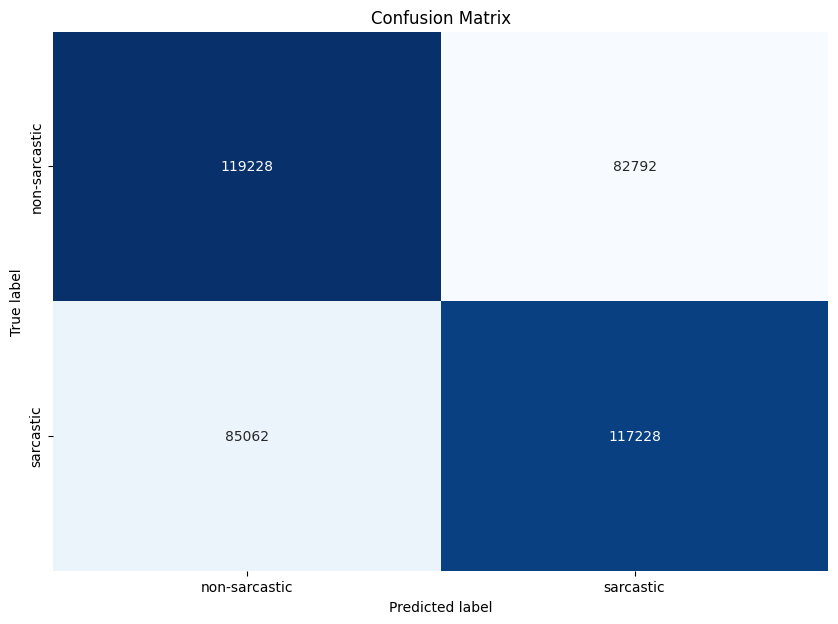

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, class_names=None):
    # Compute the confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Normalize the confusion matrix
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    # Create a heatmap using seaborn
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm_normalized, annot=cm, cmap='Blues', fmt='d', cbar=False,
                xticklabels=class_names, yticklabels=class_names)

    # Set the axis labels
    plt.xlabel('Predicted label')
    plt.ylabel('True label')

    # Set the title
    plt.title('Confusion Matrix')

    # Display the plot
    plt.show()
plot_confusion_matrix(y_test, y_pred, ["non-sarcastic", "sarcastic"])

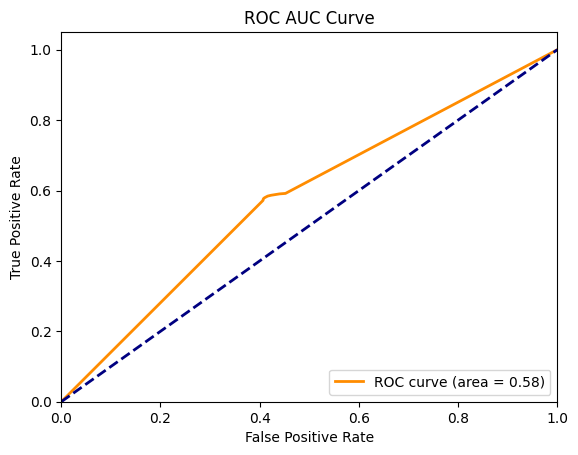

In [31]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def plot_roc_auc_curve(y_true, y_pred_proba, title='ROC AUC Curve'):
    # Compute the ROC curve points and AUC score
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    # Create the ROC curve plot
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")

    # Display the plot
    plt.show()

plot_roc_auc_curve(y_test, y_pred_proba[:,1])


In [32]:
import numpy as np
from sklearn.metrics import roc_curve

def find_best_threshold(y_true, y_pred_proba):
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba)
    
    # Calculate the Youden's J statistic for each threshold
    j_scores = tpr - fpr
    
    # Find the index of the best threshold
    best_threshold_index = np.argmax(j_scores)
    
    # Return the best threshold
    return thresholds[best_threshold_index]

threshold = find_best_threshold(y_test, y_pred_proba[:,1])
threshold

0.5416666666666666

In [35]:
def make_predictions(y_proba) -> int:
    predictions = list()
    for value in y_proba[:,1]:
        if value >= 0.4:
            predictions.append(1)
        else:
            predictions.append(0)

    return predictions

              precision    recall  f1-score   support

           0       0.58      0.58      0.58    202020
           1       0.58      0.58      0.58    202290

    accuracy                           0.58    404310
   macro avg       0.58      0.58      0.58    404310
weighted avg       0.58      0.58      0.58    404310



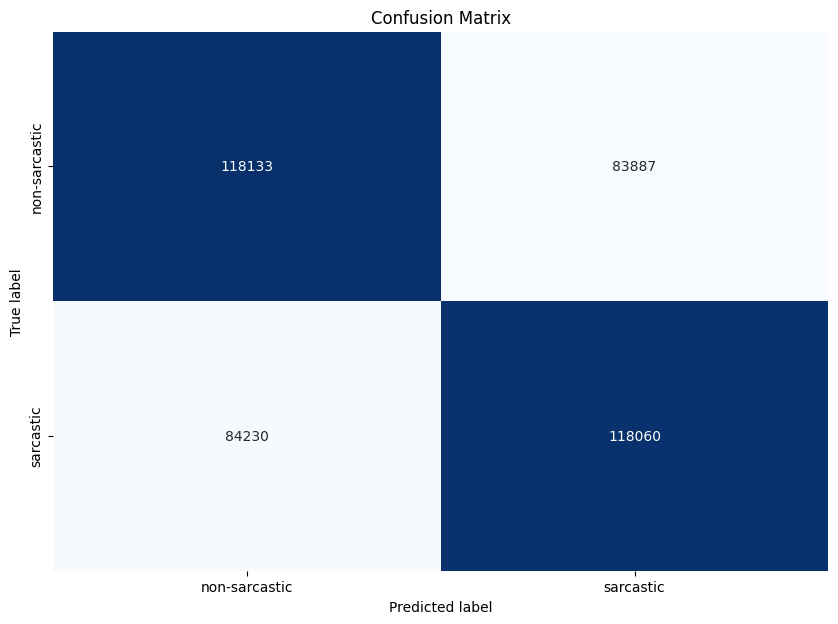

In [36]:
print(classification_report(y_test, make_predictions(y_pred_proba)))
plot_confusion_matrix(y_test, make_predictions(y_pred_proba), ["non-sarcastic", "sarcastic"])